<Figure size 1000x600 with 0 Axes>

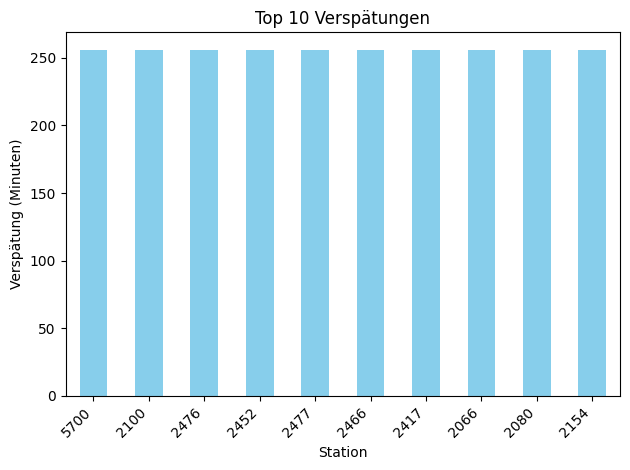

          Stop  Station             planned            realtime  \
50944  3811331     5700 2023-12-10 15:56:00 2023-12-10 20:12:52   
50946  3811333     2100 2023-12-10 16:05:00 2023-12-10 20:21:52   
50953  3811340     2476 2023-12-10 16:23:00 2023-12-10 20:39:22   
50952  3811339     2452 2023-12-10 16:22:00 2023-12-10 20:38:22   
50951  3811338     2477 2023-12-10 16:20:00 2023-12-10 20:36:22   
...        ...      ...                 ...                 ...   
54504  3890375     1157 2023-12-11 13:15:00 2023-12-11 14:48:02   
54659  3892421     1242 2023-12-11 13:37:00 2023-12-11 15:09:02   
54511  3890382     1229 2023-12-11 13:30:00 2023-12-11 15:02:02   
54658  3892420     1231 2023-12-11 13:36:00 2023-12-11 15:08:02   
54510  3890381     1144 2023-12-11 13:28:00 2023-12-11 15:00:02   

                          delay  
50944 0 days 00:00:00.000000256  
50946 0 days 00:00:00.000000256  
50953 0 days 00:00:00.000000256  
50952 0 days 00:00:00.000000256  
50951 0 days 00:00:00.000

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()


cursor.execute("SELECT id, api_station, api_plannedDeparture, api_realtimeDeparture FROM stops WHERE api_plannedDeparture != api_realtimeDeparture")
inaccurate = cursor.fetchall()


df = pd.DataFrame(list(inaccurate), columns=['Stop', 'Station', 'planned', 'realtime'])

df['delay'] = (df['realtime'] - df['planned']) / (60 * 10**9)
df = df.sort_values(by='delay', ascending=False)

# Plot the top 10 delays
plt.figure(figsize=(10, 6))
ax = df.head(10).plot(kind="bar", x='Station', y='delay', rot=45, align='center', legend=False, color='skyblue')
plt.xlabel('Station')
plt.ylabel('Verspätung (Minuten)')
plt.title('Top 10 Verspätungen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(df.head(200))